In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PWMCalc:
    v_input=15
    v_out=np.array(list(range(13)))
    v_diode=1.2
    freq_pwm=1920
    delta_vi=0.1
    delta_vo=0.05
    power_payload=15
    
    def __init__(self):
        self.v_input=15
        self.v_out=np.array(list(range(13)))
        self.freq_pwm=1920
        self.delta_vi=0.1
        self.delta_vo=0.05
        self.power_payload=15
        self.print_parameters()
        
    def __init__(self,vi,vo,vd,f_pwm,dvi,dvo,pwr):
        self.v_input=vi
        self.v_out=vo
        self.v_diode=vd
        self.freq_pwm=f_pwm
        self.delta_vi=dvi
        self.delta_vo=dvo
        self.power_payload=pwr
        self.print_parameters()
        
    def print_parameters(self):
        print("input voltage:",self.v_input)
        print("output voltage range:",self.v_out)
        print("Voltage of diode:",self.v_diode)
        print("PWM freqfrequency:",self.freq_pwm)
        print("Max ΔVi:",self.delta_vi)
        print("Max ΔVo:",self.delta_vo)
        print("Payload power:",self.power_payload)
        
    def duty(self):
        return (self.v_out+self.v_diode)/(self.v_input+self.v_diode)
    def inductor_range(self,L_tol):
        coeff1=(self.v_out+self.v_diode)*(self.v_input-self.v_out)/(self.power_payload/self.v_out)
        return coeff1/(self.freq_pwm*L_tol*(self.v_input+self.v_diode))*1e3
    def average_input_cur(self):
        coeff1=self.v_diode/(self.v_input+self.v_diode)
        return(self.power_payload/(self.v_out*self.v_input)*(self.v_out+(self.v_input-self.v_out)*coeff1))
    def input_min_capacity(self):
        dvi=self.delta_vi*self.v_input
        coeff1=self.power_payload/(self.v_out*dvi*self.v_input*self.freq_pwm)
        coeff2=(self.v_input-self.v_out)/(self.v_input+self.v_diode)
        return coeff1*(self.v_out+self.v_diode*coeff2)*coeff2*1e6
    def output_min_capacity(self,L):
        coeff1=8*self.delta_vo*self.v_out[-1]*(self.freq_pwm**2)*L
        coeff2=(self.v_out+self.v_diode)*(self.v_input-self.v_diode)/(self.v_input+self.v_diode)
        return coeff2/coeff1*1e6
    def input_max_esr(self,L):
        dvi=self.delta_vi*self.v_input
        coeff1=2*self.freq_pwm*L*(self.v_input+self.v_diode)
        return dvi/(self.power_payload/self.v_out+(self.v_out+self.v_diode)*(self.v_input-self.v_out)/coeff1)
    def output_max_esr(self,L):
        dvo=self.delta_vo*self.v_out[-1]
        coeff1=self.freq_pwm*L*(self.v_input+self.v_diode)
        return dvo*coeff1/((self.v_out+self.v_diode)*(self.v_input-self.v_out))

In [2]:
calculator1=PWMCalc(15,np.array(list(range(13))),1.2,3e5,0.04,0.01,15)

input voltage: 15
output voltage range: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Voltage of diode: 1.2
PWM freqfrequency: 300000.0
Max ΔVi: 0.04
Max ΔVo: 0.01
Payload power: 15


[0.07407407 0.13580247 0.19753086 0.25925926 0.32098765 0.38271605
 0.44444444 0.50617284 0.56790123 0.62962963 0.69135802 0.75308642
 0.81481481]


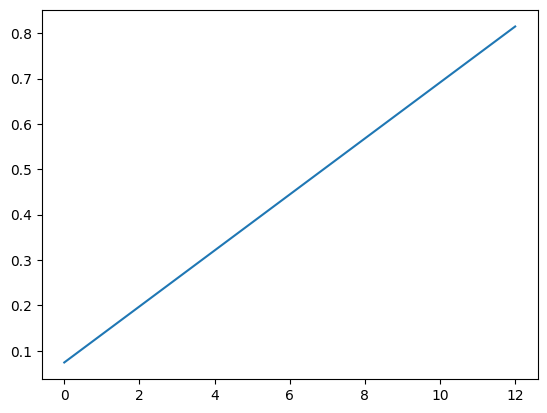

In [3]:
d=calculator1.duty()
print(d)
plt.plot(calculator1.v_out,d)
plt.show()

C:\Users\Falke\AppData\Local\Temp\ipykernel_40496\3644609692.py:48: RuntimeWarning: divide by zero encountered in divide
  return(self.power_payload/(self.v_out*self.v_input)*(self.v_out+(self.v_input-self.v_out)*coeff1))


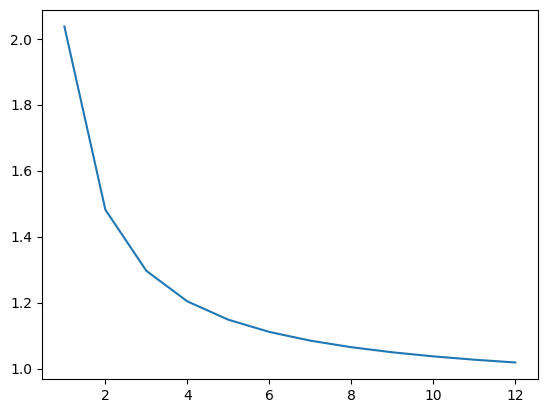

In [4]:
plt.plot(calculator1.v_out,calculator1.average_input_cur())
plt.show()

In [5]:
l_calc=calculator1.inductor_range(0.2).max()
l_int=np.ceil(l_calc)
print(l_int)

1.0


C:\Users\Falke\AppData\Local\Temp\ipykernel_40496\3644609692.py:44: RuntimeWarning: divide by zero encountered in divide
  coeff1=(self.v_out+self.v_diode)*(self.v_input-self.v_out)/(self.power_payload/self.v_out)


In [6]:
l_int=20
print(calculator1.input_min_capacity())
print(calculator1.input_max_esr(l_int*1e-3))
print(calculator1.output_min_capacity(l_int*1e-3))
print(calculator1.output_max_esr(l_int*1e-3))

[       inf 9.78001321 6.60468425 5.33455266 4.54072042 3.93740792
 3.42935528 2.97573686 2.55613982 2.1592237  1.77818422 1.40869139
 1.04785856]
[0.         0.03999958 0.07999772 0.11999378 0.15998745 0.19997874
 0.239968   0.27995591 0.31994347 0.35993201 0.3999232  0.43991902
 0.47992179]
[0.00059156 0.00108453 0.0015775  0.00207047 0.00256344 0.00305641
 0.00354938 0.00404235 0.00453532 0.00502829 0.00552126 0.00601423
 0.0065072 ]
[648.         378.7012987  280.38461538 231.42857143 203.91608392
 188.12903226 180.         177.80487805 181.11801242 190.58823529
 208.28571429 239.01639344 294.54545455]


C:\Users\Falke\AppData\Local\Temp\ipykernel_40496\3644609692.py:51: RuntimeWarning: divide by zero encountered in divide
  coeff1=self.power_payload/(self.v_out*dvi*self.v_input*self.freq_pwm)
C:\Users\Falke\AppData\Local\Temp\ipykernel_40496\3644609692.py:61: RuntimeWarning: divide by zero encountered in divide
  return dvi/(self.power_payload/self.v_out+(self.v_out+self.v_diode)*(self.v_input-self.v_out)/coeff1)


C:\Users\Falke\AppData\Local\Temp\ipykernel_40496\3644609692.py:51: RuntimeWarning: divide by zero encountered in divide
  coeff1=self.power_payload/(self.v_out*dvi*self.v_input*self.freq_pwm)


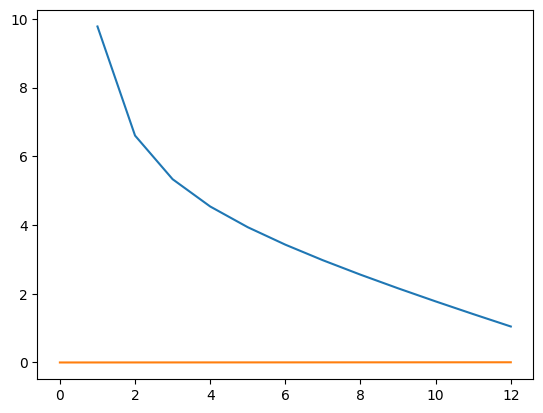

In [7]:
plt.plot(calculator1.v_out,calculator1.input_min_capacity())
plt.plot(calculator1.v_out,calculator1.output_min_capacity(l_int*1e-3))
plt.show()